In [ ]:
import pandas as pd
df = pd.read_csv('tc_v2.csv')

In [ ]:
df

In [ ]:
df = df[1:]

In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 2.0MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 460kB 54.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *
from nltk import word_tokenize

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import pickle
import string

In [ ]:
# 결측치 제거
df = df.dropna(axis = 0)
len(df) #55197

55197

In [ ]:
a = list(np.array(df['text_p'].tolist()))

In [ ]:
text_noun=[okt.nouns(doc) for doc in df.text_p]
print(text_noun)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
text_noun

In [ ]:
a

In [ ]:
aa =[]

In [ ]:
num = 0 
for i, document in enumerate(a):
  clean_words = []
  for word in okt.pos(document, stem=True): #어간 추출
    if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
      clean_words.append(word[0])
      #print(clean_words)
  print(num)
  num = num + 1
  document = ' '.join(clean_words)
  # print(document) 
  aa.append(document)

In [ ]:
df['text_tokenized'] = aa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## 불용어 제거
import json
with open('/content/drive/MyDrive/korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)
stopwords.extend(['에서','고','이다','는','한','안녕','형','안녕하다','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요'])  
stopwords.extend(['보다','되다','보고','싶다','내','기','글','애','해','함','개','게','후',
'알','가다','만','옆','전','써다','이렇다','위','알다','좋다','자다','중','수','없다',
'그렇다','임','줄','새','말','어떻다','떻다'])

#df['text_tokenized_2'] = df.text_tokenized.apply(lambda x: [ a for a in x if a not in stopwords])
#df.to_csv('hg_preprocessed.csv',encoding='utf-8')

In [ ]:
stopwords.extend(['보다','되다','보고','싶다','내','기','글','애','해','함','개','게','후',
'알','가다','만','옆','전','써다','이렇다','위','알다','좋다','자다','중','수','없다', '두',
'그렇다','임','줄','새','말','어떻다','떻다'])

In [ ]:
df['text_tokenized_2'] = df.text_tokenized.apply(lambda x: [ a for a in x if a not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#text_st=[a for doc in df.text_tokenized_2 for a in doc if a not in stopwords]

In [ ]:
split=[]

In [ ]:
for doc in aa:
  split.append(doc.split())

In [ ]:
num = 0
for doc in split:
  prep= []
  for j in doc:
    if j not in stopwords:
      #print(j)
      prep.append(j)    
  real.append(prep)
  num = num+1
  print(num)

In [ ]:
len(real)

55197

In [ ]:
prep = []
real = []

In [ ]:
df['text_tokenized_2'] = split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['text_tokenized_3'] = real
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,text_clean,text_sep,text_p,text_tokenized,text_tokenized_2,text_tokenized_3
1,칼라아악무 재도전 \n다육이 키워 본 경험도 없이 작년에 무턱대고 아악무 외목대 큰...,칼라아악무 재도전 다육이 키워 본 경험도 없이 작년에 무턱대고 아악무 외목대 큰 거...,칼라아악 무 재도전 다육이 키워 본 경험도 없이 작년에 무턱대고 아악 무 외목대 큰...,칼라 아악 무 재도전 다육이 키워 본 경험도 없이 작년에 무턱대고 아악 무 이목대 ...,칼라 아악 무 재다 다육 키우다 보다 경험 작년 무턱 대고 아악 무 이목 크다 거 ...,"[칼라, 아악, 무, 재다, 다육, 키우다, 보다, 경험, 작년, 무턱, 대고, 아...","[칼라, 아악, 무, 재다, 다육, 키우다, 경험, 작년, 무턱, 대고, 아악, 무..."
2,두더지 어떻게해야하나요? \n닭장밑에랑 고구마 심어놓은데에 두더지가 땅파놔서 스트레...,두더지 어떻게해야하나요 닭장밑에랑 고구마 심어놓은데에 두더지가 땅파놔서 스트레스 ...,두더지 어떻게 해야 하나요 닭장 밑에 랑 고구마 심어 놓은 데에 두더지가 땅파놔서 ...,두더지 어떻게 해야 하나요 닭장 밑에 랑 고구마 심어 놓은 데에 두더지가 땅 파놔서...,두더지 어떻다 하다 하나요 닭장 밑 고구마 심다 놓다 데 두더지 땅 파 놓다 스트레...,"[두더지, 어떻다, 하다, 하나요, 닭장, 밑, 고구마, 심다, 놓다, 데, 두더지...","[두더지, 닭장, 밑, 고구마, 심다, 놓다, 두더지, 땅, 파, 놓다, 스트레스,..."
3,미래에는 집에 인공태양 한 개씩은 있겠지 \n베란다에서 해바라기를 키우는거야 - ...,미래에는 집에 인공태양 한 개씩은 있겠지 베란다에서 해바라기를 키우는거야,미래에는 집에 인공태양 한 개씩은 있겠지 베란다에서 해바라기를 키우는 거야,미래에는 집에 인공태양 한 개씩은 있겠지 베란다에서 해바라기를 키우는 거야,미래 집 인공 태양 하다 개 있다 베란다 해바라기 키우다,"[미래, 집, 인공, 태양, 하다, 개, 있다, 베란다, 해바라기, 키우다]","[미래, 집, 인공, 태양, 베란다, 해바라기, 키우다]"
4,땅에 떨어진 버찌 \n주워서 발아 가능?,땅에 떨어진 버찌 주워서 발아 가능,땅에 떨어진 버찌 주워서 발아 가능,땅에 떨어진 버찌 주워서 발아 가능,땅 떨어지다 버찌 줍다 발아 가능,"[땅, 떨어지다, 버찌, 줍다, 발아, 가능]","[땅, 떨어지다, 버찌, 줍다, 발아, 가능]"
5,다이소 한련화 잘큰다 \n어제만 하더라도 빨간꽃 꽃몽오리 몇개와 꽃 두개 폈었는데순...,다이소 한련화 잘큰다 어제만 하더라도 빨간꽃 꽃몽오리 몇개와 꽃 두개 폈었는데순식간...,다이소 한련화 잘 큰 다 어제만 하더라도 빨간 꽃 꽃몽오리 몇 개와 꽃 두 개 폈었...,다이소 한련화 잘 큰 다 어제만 하더라도 빨간 꽃 꽃 몽우리 몇 개와 꽃 두 개 폈...,다이소 한련화 자다 크다 어제 하다 빨갛다 꽃 꽃 몽 우리 몇 개 꽃 두 개 피다 ...,"[다이소, 한련화, 자다, 크다, 어제, 하다, 빨갛다, 꽃, 꽃, 몽, 우리, 몇...","[다이소, 한련화, 크다, 어제, 빨갛다, 꽃, 꽃, 몽, 꽃, 피다, 순식간, 노..."
...,...,...,...,...,...,...,...
55813,나무에 핀 꽃인데 무슨꽃일까요? \n너무 궁금하네요 알려주시면 감사하겠습니다ㅎㅎ,나무에 핀 꽃인데 무슨꽃일까요 너무 궁금하네요 알려주시면 감사하겠습니다ㅎㅎ,나무에 핀 꽃인데 무슨 꽃일까요 너무 궁금하네요 알려주시면 감사하겠습니다ㅎㅎ,나무에 핀 꽃인데 무슨 꽃일까요 너무 궁금하네요 알려주시면 감사하겠습니다ㅎㅎ,나무 핀 꽃 무슨 꽃 이다 요 궁금하다 알다 감사하다,"[나무, 핀, 꽃, 무슨, 꽃, 이다, 요, 궁금하다, 알다, 감사하다]","[나무, 핀, 꽃, 꽃, 궁금하다, 감사하다]"
55814,이 꽃 이름 아시나요??ㅠㅠㅠㅠㅠ \n지인이 찍은 꽃인데 너무 예뻐서요ㅠㅠㅠㅠㅠ,이 꽃 이름 아시나요 ㅠㅠㅠㅠㅠ 지인이 찍은 꽃인데 너무 예뻐서요ㅠㅠㅠㅠㅠ,이 꽃 이름 아시나요 ㅠㅠㅠㅠㅠ 지인이 찍은 꽃인데 너무 예뻐서요ㅠㅠㅠㅠㅠ,이 꽃 이름 아시나요 ㅠㅠㅠㅠㅠ 지인이 찍은 꽃인데 너무 예뻐서요ㅠㅠㅠㅠㅠ,이 꽃 이름 알다 지인 찍다 꽃 예쁘다,"[이, 꽃, 이름, 알다, 지인, 찍다, 꽃, 예쁘다]","[꽃, 이름, 지인, 찍다, 꽃, 예쁘다]"
55815,형님들 여기서 이게 뭔지 물어봐도되나요?? \n다육화분에 버섯이 피었는데 이버섯이 ...,형님들 여기서 이게 뭔지 물어봐도되나요 다육화분에 버섯이 피었는데 이버섯이 무엇...,형님들 여기서 이게 뭔지 물어봐도 되나요 다육화분에 버섯이 피었는데 이버섯이 무엇인...,형님들 여기서 이게 뭔지 물어봐도 되나요 다육 화분에 버섯이 피었는데 이어 버섯이 ...,형님 여기 이 물어보다 되다 다육 화분 버섯 피다 이다 버섯 무엇 왜 피다 알 수가 없다,"[형님, 여기, 이, 물어보다, 되다, 다육, 화분, 버섯, 피다, 이다, 버섯, ...","[물어보다, 다육, 화분, 버섯, 피다, 버섯, 피다, 수가]"
55816,독특하게 생긴 꽃인데 \n이게 무슨 풀인가요? - dc official App,독특하게 생긴 꽃인데 이게 무슨 풀인가요,독특하게 생긴 꽃인데 이게 무슨 풀인가요,독특하게 생긴 꽃인데 이게 무슨 풀인 가요,독특하다 생기다 꽃 이 무슨 풀 가요,"[독특하다, 생기다, 꽃, 이, 무슨, 풀, 가요]","[독특하다, 생기다, 꽃, 풀, 가요]"


In [ ]:
df['text_noun'] = text_noun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for doc in text_noun:
  prep= []
  for j in doc:
    if j not in stopwords:
      #print(j)
      prep.append(j)    
  real.append(prep)
  num = num+1
  print(num)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['text_noun'] = real

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [ ]:
nva = list(df.text_tokenized_3)
n = list(df.text_noun)

In [ ]:
nnva=[]
for i in range(len(nva)):
  nnva.append(eval(nva[i]))

In [ ]:
nn=[]
for i in range(len(n)):
  nn.append(eval(n[i]))

In [ ]:
va=[]
for i in range(len(nnva)):
  va.append(list(set(nnva[i]) - set(nn[i])))

In [ ]:
df['text_va'] = va

In [ ]:
a = ['a','b','v']
b = ['a','b']
list(set(a) - set(b))

['v']

In [ ]:
n_v_a=[]
n_ =[]
for doc in nva:
  n_v_a.append(doc.split())
for doc in n:
  n_.append(doc.split())  

In [ ]:
nva = list(df.text_tokenized_3)
n = list(df.text_noun)
va = []
for i in range(len(nva)):
  va.append(set(nva[i]) - set(n[i]))

In [ ]:
s = set(temp2)
temp3 = [x for x in temp1 if x not in s] 

In [ ]:
list(set(nva[1]) - set(n[1]))

['하', '심', '놓', '다']

In [ ]:
## text_noun
data1 = df.text_noun.tolist()
data2 = flatten(data1)

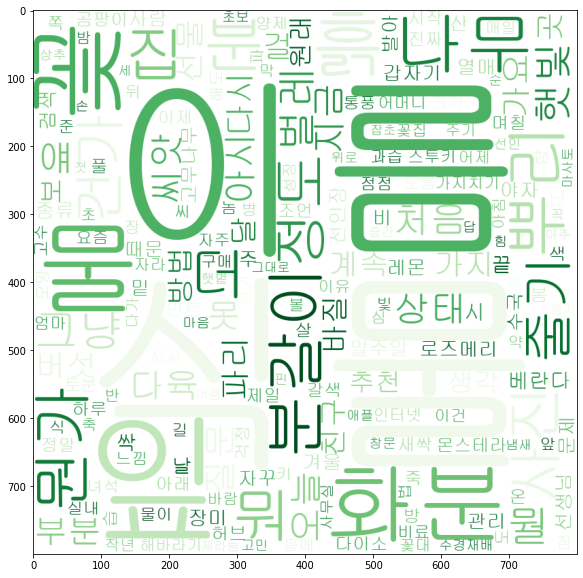

In [ ]:
text = nltk.Text(data2)


font_path= '/content/NGULIM.TTF'

count= Counter(text)
wordclouds = WordCloud(font_path = font_path,background_color='White', width= 800, height= 800, colormap = 'Greens').generate_from_frequencies(count)


fig= plt.figure(figsize = (10,10))
plt.imshow(wordclouds.to_array())
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter

In [ ]:
## text_tokenized_3
data1 = df.text_tokenized_3.tolist()
data2 = flatten(data1)

In [ ]:
data1 = df.text_tokenized_3.tolist()
data2 = flatten(data1)

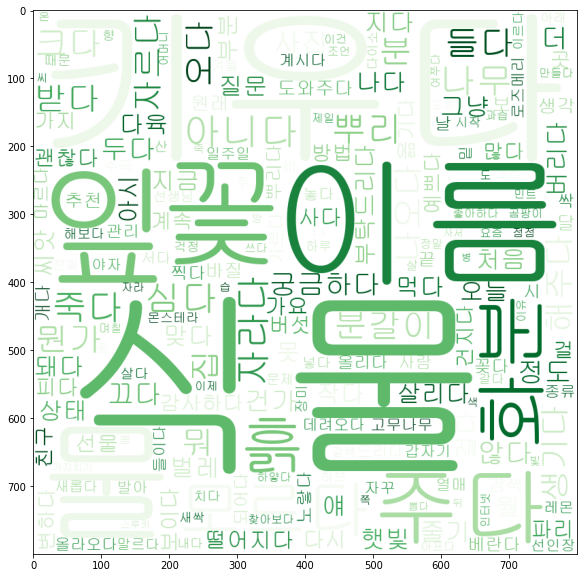

In [ ]:
text = nltk.Text(data2)
count= Counter(text)
wordclouds = WordCloud(font_path = font_path,background_color='White', width= 800, height= 800, colormap = 'Greens').generate_from_frequencies(count)


fig= plt.figure(figsize = (10,10))
plt.imshow(wordclouds.to_array())
plt.show()

In [ ]:
import nltk

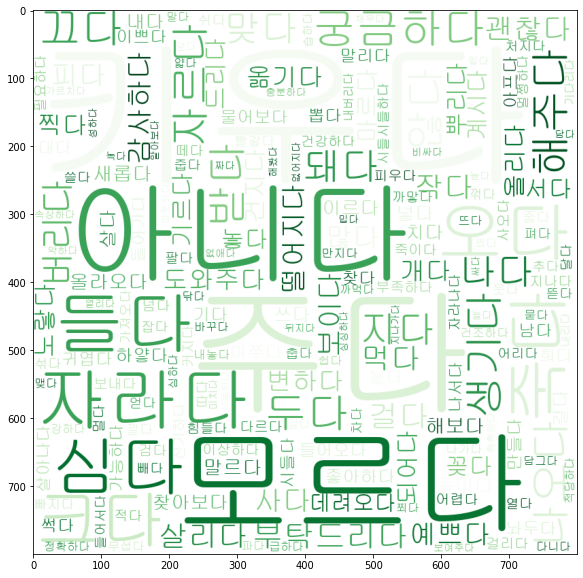

In [ ]:
data1 = df.text_va.tolist()
data2= flatten(data1)
text = nltk.Text(data2)
count= Counter(text)
font_path= '/content/NGULIM.TTF'
wordclouds = WordCloud(font_path = font_path,background_color='White', width= 800, height= 800, colormap = 'Greens').generate_from_frequencies(count)


fig= plt.figure(figsize = (10,10))
plt.imshow(wordclouds.to_array())
plt.show()

In [ ]:
df.to_csv('tc_v3.csv',encoding='utf-8')